# Thématique 2 - Analyse bivariée de variables quantitatives

Réalisé par Alexandre Pauly.

### Importation des librairies

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data pre-processing

In [2]:
# Préparation du fichier de données
filepath = "../data"
filename = "DepensesEduData.csv"
file = os.path.join(filepath, filename)

# Lecture des données
df = pd.read_csv(file, delimiter=";")

# Affichage des indicateurs de positions et de dispersions
df.describe()

,nbEleves,Depenses
count,26.000000,26.000000
mean,4846.961538,25399.626923
std,7483.535029,32314.238293
min,74.000000,492.900000
25%,1054.900000,3048.050000
50%,1864.200000,10030.800000
75%,6687.350000,27863.850000
max,35062.200000,106626.400000


Ce jeu de données comptabilise les dépenses d'un pays en fonction de son nombre d'élèves. Ici nous comptons 26 pays, soit 26 individus. Il y a au moins 74 élèves dans chaque pays et au plus 35062 élèves dans cet échantillon de pays.

In [3]:
# Affichage des indicateurs de positions et de  pour la colonne CLIMAT
df['nbEleves'].describe()

count       26.000000
mean      4846.961538
std       7483.535029
min         74.000000
25%       1054.900000
50%       1864.200000
75%       6687.350000
max      35062.200000
Name: nbEleves, dtype: float64

In [4]:
df.head()

,nbEleves,Depenses
Allemagne,14065.4,106626.4
Autriche,1467.8,13722.8
Belgique,2427.7,18427.4
Bulgarie,1141.8,2968.0
Danemark,1151.6,12909.4


In [5]:
df.tail()

,nbEleves,Depenses
RoyaumeUni,12670.5,91829.7
Slovaquie,1059.4,3288.2
Slovenie,387.9,2314.0
Suede,2022.8,18715.7
PaysMagique,35062.2,62050.8


In [6]:
df.shape

(26, 2)

On sait qu'il y a 26 pays pour 2 variables à étudier.

In [7]:
df.dtypes

nbEleves    float64
Depenses    float64
dtype: object

Dans cette étude, nous avons que des variables quantitatives.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, Allemagne to PaysMagique
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nbEleves  26 non-null     float64
 1   Depenses  26 non-null     float64
dtypes: float64(2)
memory usage: 624.0+ bytes


In [9]:
df.columns

Index(['nbEleves', 'Depenses'], dtype='object')

Explication des variables :
- nbEleves : Nombre d'élèves dans un pays
- Depenses : Budget attribué aux études pour un pays

In [10]:
df.isnull().sum()

nbEleves    0
Depenses    0
dtype: int64

Le jeu de données n'a pas l'air de présenter de données manquantes.

In [11]:
print(df)

             nbEleves  Depenses
Allemagne     14065.4  106626.4
Autriche       1467.8   13722.8
Belgique       2427.7   18427.4
Bulgarie       1141.8    2968.0
Danemark       1151.6   12909.4
Espagne        7615.3   51025.8
Estonie         257.5    1116.1
Finlande       1251.3    9177.7
France        12264.6   96315.8
Hongrie        1873.0    8160.8
Irlande        1053.4    7873.1
Italie         9510.4   65641.2
Lettonie        430.6    1579.4
Lituanie        738.0    2325.9
Luxembourg       80.2    1035.9
Malte            74.0     492.9
PaysBas        3379.7   28686.1
Pologne        8168.4   25397.1
Portugal       2108.6   10575.5
RepTcheque     1855.4    8648.5
Roumanie       3903.5    9486.1
RoyaumeUni    12670.5   91829.7
Slovaquie      1059.4    3288.2
Slovenie        387.9    2314.0
Suede          2022.8   18715.7
PaysMagique   35062.2   62050.8


## Analyse statistique

### Nuage de points

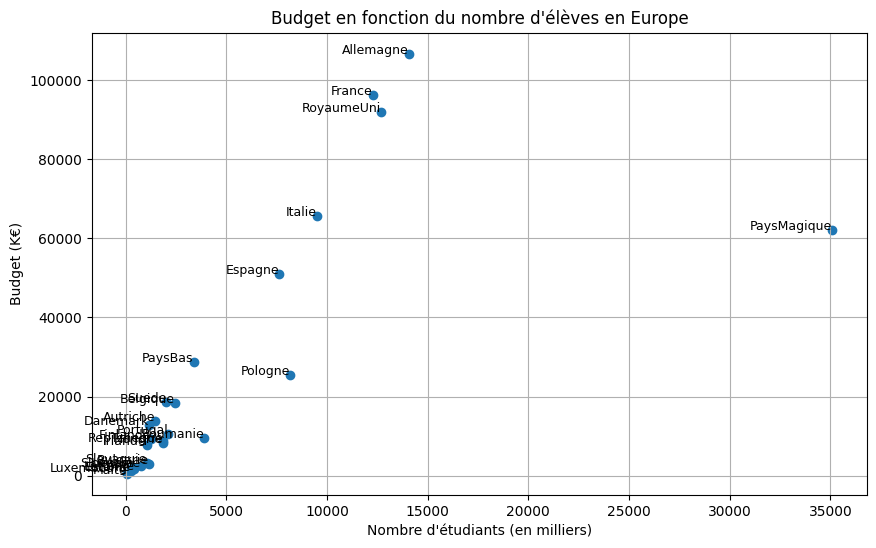

In [12]:
x = df['nbEleves']
y = df['Depenses']

# Création du nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(x, y)

# Ajout des noms des pays comme labels
for i, pays in enumerate(df.index):
    plt.text(x[i], y[i], pays, fontsize=9, ha='right')

# Titre et labels des axes
plt.title("Budget en fonction du nombre d'élèves en Europe")
plt.xlabel("Nombre d'étudiants (en milliers)")
plt.ylabel("Budget (K€)")

plt.grid(True)
plt.show()

Beaucoup de pays en sont proche de l’origine. Dans l'ensemble, le jeu de donnée présente une forme allongée avec les pays ayant de fortes dépenses (France, Allemagne,..) au plus haut. Un pays reste très éloigné des autres, le PaysMagique. Au vu des caractéristiques, il a tout d'un individu atypique qu'il va falloir écarter du jeu de données pour apporter une meilleure analyse.

Les pays amassés en bas à gauche du graphique sont ceux présentant les dépenses les plus faibles, mais qui ont également un nombre d'élèves assez faible au vu des proportions.

### Coefficient de corrélation linéaire

In [13]:
correlation_matrix = x.corr(y)
print(correlation_matrix)

0.7236921197262562


Le coefficient de corrélation linéaire est positif ce qui veut dire que plus le nombre d'élèves augmente, plus la dépense augmente

### Régression linéaire

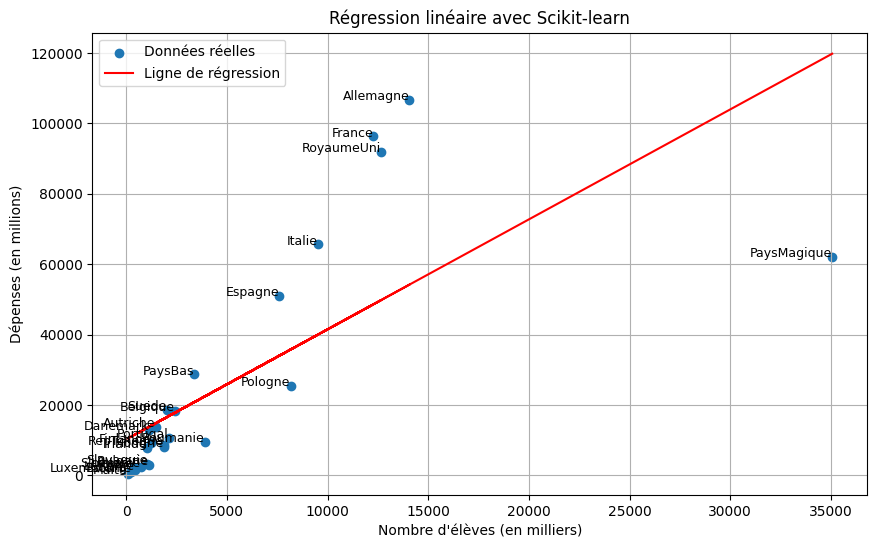

Coefficient de régression: 3.124934876188692
Intercept: 10253.187767993266
R^2 score: 0.5237302841538818


In [14]:
from sklearn.linear_model import LinearRegression

# Données
X = np.array(x).reshape(-1, 1)
y = np.array(y)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédictions
y_pred = model.predict(X)

# Affichage du graphique avec la ligne de régression
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Données réelles')

# Ajout des noms des pays comme labels
for i, pays in enumerate(df.index):
    plt.text(x[i], y[i], pays, fontsize=9, ha='right')

plt.plot(x, y_pred, color='red', label='Ligne de régression')
plt.xlabel("Nombre d'élèves (en milliers)")
plt.ylabel("Dépenses (en millions)")
plt.title("Régression linéaire avec Scikit-learn")
plt.legend()
plt.grid(True)
plt.show()

# Coefficients
print(f"Coefficient de régression: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R^2 score: {model.score(X, y)}")

Les données semblent visuellement mal approchées par le modèle et cela se confirme par la valeur du R² qui est de 52%. Sur ce graphique, on constate bien que PaysMagique est atypique car il s'éloigne grandement de la régression linéaire en sachant qu'il influence grandement son calcul au vu de ses valeurs : 35000 élvèves pour un budget de + de 60 000 millions d'euros.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     26.39
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           2.94e-05
Time:                        14:19:40   Log-Likelihood:                -296.70
No. Observations:                  26   AIC:                             597.4
Df Residuals:                      24   BIC:                             599.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.025e+04   5349.543      1.917      0.0

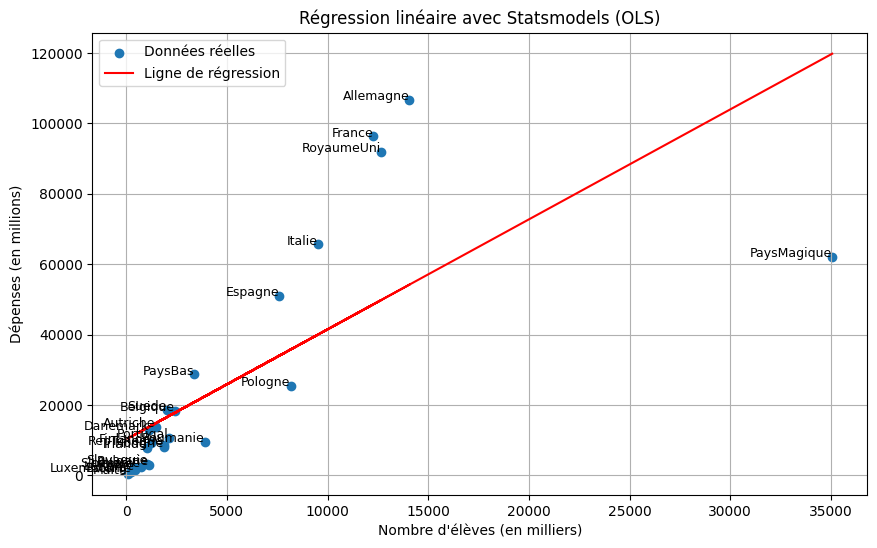

In [15]:
import statsmodels.api as sm

# Ajout d'une constante pour l'intercept
X = sm.add_constant(x)

# Modèle de régression linéaire
model = sm.OLS(y, X)
results = model.fit()

# Résultats
print(results.summary())

# Prédictions
y_pred = results.predict(X)

# Affichage du graphique avec la ligne de régression
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Données réelles')

# Ajout des noms des pays comme labels
for i, pays in enumerate(df.index):
    plt.text(x[i], y[i], pays, fontsize=9, ha='right')
    
plt.plot(x, y_pred, color='red', label='Ligne de régression')
plt.xlabel("Nombre d'élèves (en milliers)")
plt.ylabel("Dépenses (en millions)")
plt.title("Régression linéaire avec Statsmodels (OLS)")
plt.legend()
plt.grid(True)
plt.show()

Coefficient de régression: 3.1249348761886937
Intercept: 10253.187767993259
R^2: 0.5237302841538821
P-value: 2.936758855471233e-05
Erreur standard: 0.6082862368951836


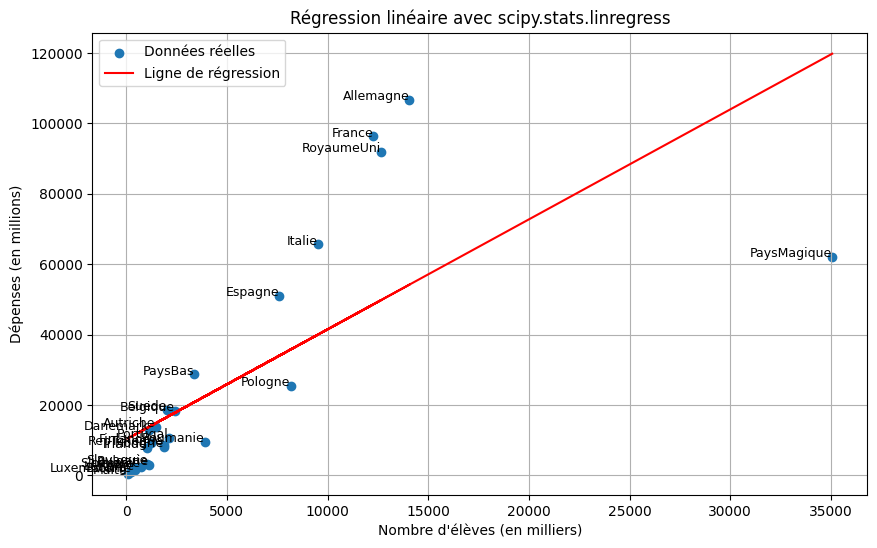

In [16]:
from scipy.stats import linregress

# Régression linéaire avec linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Affichage des résultats
print(f"Coefficient de régression: {slope}")
print(f"Intercept: {intercept}")
print(f"R^2: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Erreur standard: {std_err}")

# Prédictions
y_pred = intercept + slope * np.array(x)

# Affichage du graphique avec la ligne de régression
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Données réelles')

# Ajout des noms des pays comme labels
for i, pays in enumerate(df.index):
    plt.text(x[i], y[i], pays, fontsize=9, ha='right')

plt.plot(x, y_pred, color='red', label='Ligne de régression')
plt.xlabel("Nombre d'élèves (en milliers)")
plt.ylabel("Dépenses (en millions)")
plt.title("Régression linéaire avec scipy.stats.linregress")
plt.legend()
plt.grid(True)
plt.show()

Le R^2 est proche de 0.5, cela montre que le modèle n'est pas adapté à ce jeu de données. Toutefois, la question de l'outlier reste toujours à se poser, un modèle sans cette donnée atypique permettrait d'améliorer le modèle.

Outliers pour nb_eleves: [35062.2]
Outliers pour depenses: [106626.4, 96315.8, 65641.2, 91829.7]
Individu le plus atypique : nbEleves     35062.200000
Depenses     62050.800000
residuals   -57769.479384
Name: PaysMagique, dtype: float64


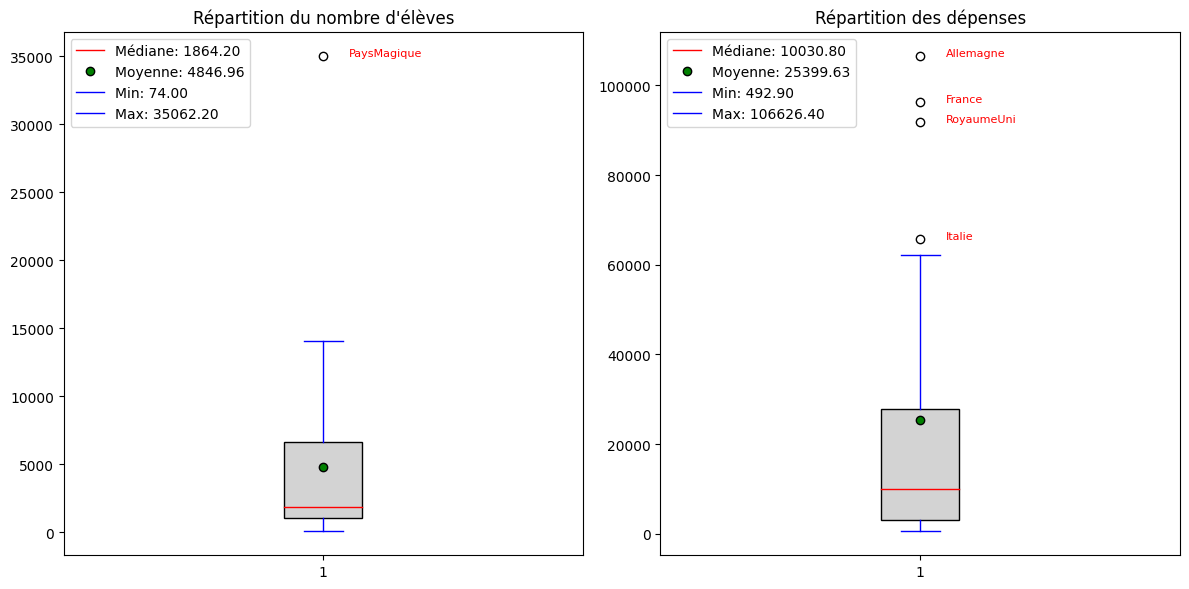

In [17]:
# Calcul des résidus
residuals = y - y_pred
df['residuals'] = residuals

# Fonction pour détecter les outliers via la méthode IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_indices = [i for i, x in enumerate(data) if x < lower_bound or x > upper_bound]
    outliers = [data[i] for i in outliers_indices]
    
    return outliers, outliers_indices

# Détection des outliers pour nb_eleves et depenses
outliers_nb_eleves, indices_outliers_nb_eleves = detect_outliers_iqr(x)
outliers_depenses, indices_outliers_depenses = detect_outliers_iqr(y)

print(f"Outliers pour nb_eleves: {outliers_nb_eleves}")
print(f"Outliers pour depenses: {outliers_depenses}")

# Suppression de l'individu atypique
outlier = df['residuals'].abs().idxmax()
print("Individu le plus atypique :", df.loc[outlier])
df_clean = df.drop(outlier)

cities = df.index

# Création de la figure pour les boxplots
plt.figure(figsize=(12, 6))

# Couleurs personnalisées pour min, max, médiane, moyenne
colors = dict(whiskers="blue", caps="blue", medians="red", means="green", fliers="purple")

# Boxplot pour nb_eleves
plt.subplot(1, 2, 1)
bp1 = plt.boxplot(x, showmeans=True, patch_artist=True,
                  boxprops=dict(facecolor="lightgray"),
                  whiskerprops=dict(color=colors['whiskers']),
                  capprops=dict(color=colors['caps']),
                  medianprops=dict(color=colors['medians']),
                  meanprops=dict(markerfacecolor=colors['means'], marker="o", markeredgecolor="black"))

plt.title("Répartition du nombre d'élèves")

# Récupération des statistiques pour nb_eleves
median_nb_eleves = np.median(x)
mean_nb_eleves = np.mean(x)
min_nb_eleves = np.min(x)
max_nb_eleves = np.max(x)

# Ajout de la légende pour nb_eleves
plt.legend([bp1["medians"][0], bp1["means"][0], bp1["whiskers"][0], bp1["whiskers"][1]],
           [f"Médiane: {median_nb_eleves:.2f}", f"Moyenne: {mean_nb_eleves:.2f}", 
            f"Min: {min_nb_eleves:.2f}", f"Max: {max_nb_eleves:.2f}"],
           loc="upper left")

# Ajouter des annotations pour les outliers de nb_eleves
for i in indices_outliers_nb_eleves:
    plt.text(1.05, x[i], cities[i], color='red', fontsize=8, ha='left')

# Boxplot pour depenses
plt.subplot(1, 2, 2)
bp2 = plt.boxplot(y, showmeans=True, patch_artist=True,
                  boxprops=dict(facecolor="lightgray"),
                  whiskerprops=dict(color=colors['whiskers']),
                  capprops=dict(color=colors['caps']),
                  medianprops=dict(color=colors['medians']),
                  meanprops=dict(markerfacecolor=colors['means'], marker="o", markeredgecolor="black"))

plt.title("Répartition des dépenses")

# Récupération des statistiques pour depenses
median_depenses = np.median(y)
mean_depenses = np.mean(y)
min_depenses = np.min(y)
max_depenses = np.max(y)

# Ajout de la légende pour depenses
plt.legend([bp2["medians"][0], bp2["means"][0], bp2["whiskers"][0], bp2["whiskers"][1]],
           [f"Médiane: {median_depenses:.2f}", f"Moyenne: {mean_depenses:.2f}", 
            f"Min: {min_depenses:.2f}", f"Max: {max_depenses:.2f}"],
           loc="upper left")

# Ajouter des annotations pour les outliers de depenses
for i in indices_outliers_depenses:
    plt.text(1.05, y[i], cities[i], color='red', fontsize=8, ha='left')

# Affichage du graphique
plt.tight_layout()
plt.show()

Bien que certains pays ont un grand nombre d'élèves, la majeure partie des pays ont moins de 1864 élèves en 2008. Pourtant, la moyenne du nombre d'élèves est à 4846, cette valeur est en partie due à l'individu atypique PaysMagique qui en compte 35062. La moyenne tend tout de même à être supérieure à la médiane car de nombreux pays ont un nombre d'élèves supérieur à 1864.

Concernant les dépenses, la majeure partie des pays ont dépensé moins de 10030 millions d'euros en 2008 alors que la moyenne de cet échantillon est de 25399 millions d'euros. Pour le coup, les dépenses comportent plusieurs individus atypiques, mais cela n'est aps étonnant au vu du dataset car des pays comme l'Allemagne, la France et le Royaume-Un sont des pays très développés qui investissent énormément dans l'éducation, en plus d'avoir une forte population, à l'inverse de Malte. Au vu de ce contexte, ce n'est pas étonnant que la moyenne tende à être supérieure à la médiane.

### Vérification des hypothèses sur les résidus

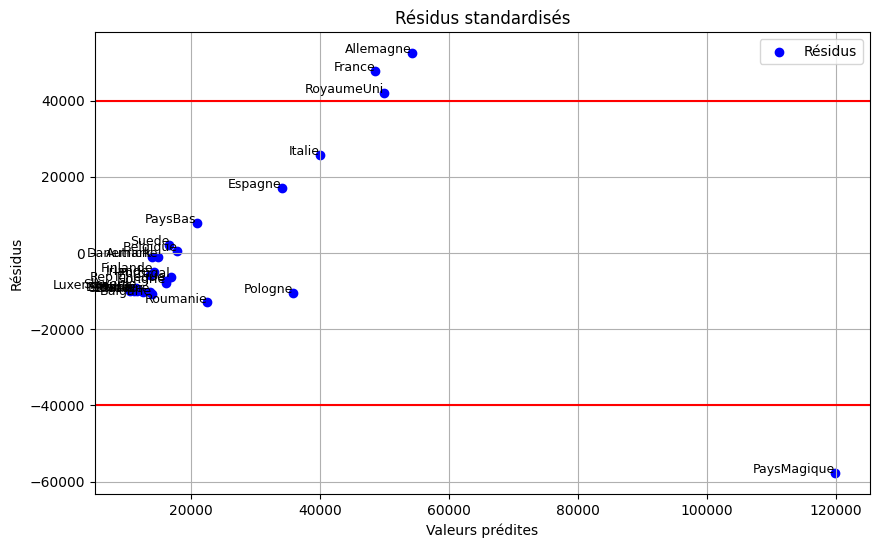

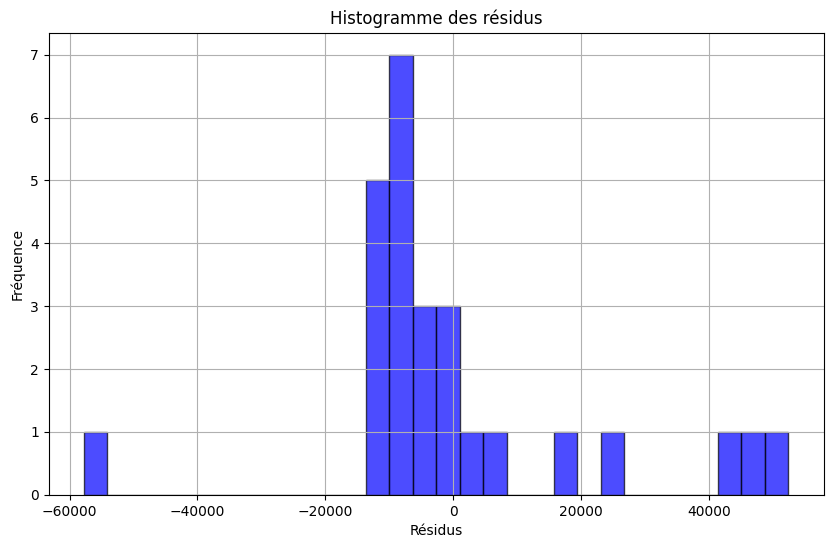

Statistique de Durbin-Watson: 1.8080725600661947


In [18]:
# Graphique des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', label='Résidus')

# Ajout des noms des pays comme labels
for i, pays in enumerate(df.index):
    plt.text(y_pred[i], residuals[i], pays, fontsize=9, ha='right')

plt.axhline(y=40000, color='red', linestyle='-')
plt.axhline(y=-40000, color='red', linestyle='-')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Résidus standardisés")
plt.grid(True)
plt.legend()
plt.show()

import scipy.stats as stats

# Histogramme des résidus
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.title("Histogramme des résidus")
plt.grid(True)
plt.show()

from statsmodels.stats.stattools import durbin_watson

# Test de Durbin-Watson
dw_stat = durbin_watson(residuals)
print(f"Statistique de Durbin-Watson: {dw_stat}")

Ces deux graphiques permettent de mettre en avant le caractère atypique de PaysMagique. En effet, la normalisation des résidus (sur un modèle correctement adapté) devrait voir sa moyenne proche de 0 et son écart-type proche de 1. Or, ici les indvidus sont davantage éparpillés.

Toutefois, un certains groupe se dégage et témoigne d'une certaine indépendance. Pour cela, nous allons supprimer PaysMagique et étudier l'évolution du modèle avec les différents critères comme le R².

### Suppression des individus atypiques : PaysMagique

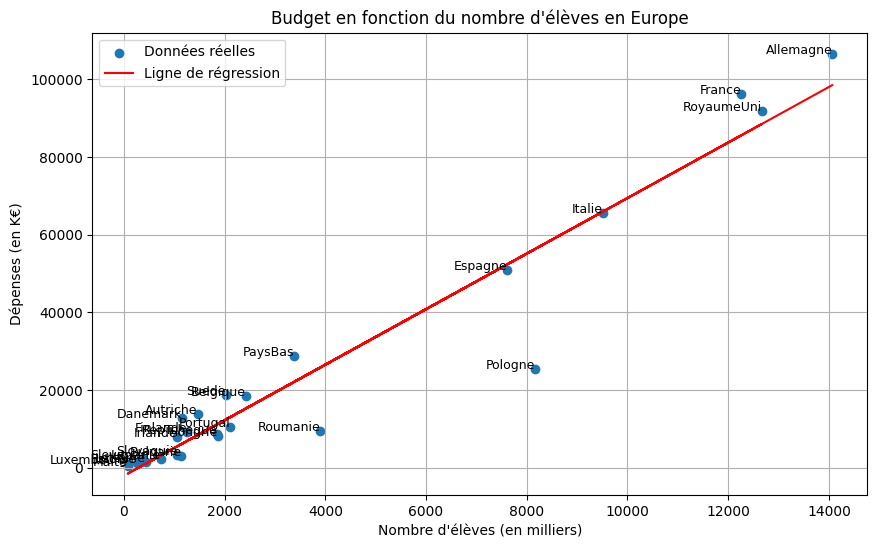

Coefficient de régression: [7.1536207]
Intercept: [-2093.81019153]
R^2 score: 0.9332649797745688


In [19]:
# On poursuit avec le jeu de données nettoyées
x_clean = df_clean[['nbEleves']]
y_clean = df_clean[['Depenses']]

X_clean = np.array(x_clean).reshape(-1, 1)
y_clean = np.array(y_clean)

model_clean = LinearRegression()
model_clean.fit(x_clean, y_clean)

# Prédictions avec les données nettoyées
y_pred_clean = model_clean.predict(x_clean)

# Affichage du graphique avec la ligne de régression
plt.figure(figsize=(10, 6))
plt.scatter(x_clean, y_clean, label='Données réelles')

# Ajout des noms des pays comme labels
for i, pays in enumerate(df_clean.index):
    plt.text(X_clean[i], y_clean[i], pays, fontsize=9, ha='right')

plt.plot(x_clean, y_pred_clean, color='red', label='Ligne de régression')
plt.xlabel("Nombre d'élèves (en milliers)")
plt.ylabel("Dépenses (en K€)")
plt.title("Budget en fonction du nombre d\'élèves en Europe")
plt.legend()
plt.grid(True)
plt.show()

# Coefficients
print(f"Coefficient de régression: {model_clean.coef_[0]}")
print(f"Intercept: {model_clean.intercept_}")
print(f"R^2 score: {model_clean.score(x_clean, y_clean)}")

Retirer l'individu atypique 'PaysMagique' aura permis d'améliorer fortement le R^2, passant de 0.52 à 0.93. Maintenant, nous avons un modèle bien plus intéressant car 93% de la variabilité des dépenses est expliquée par le modèle.

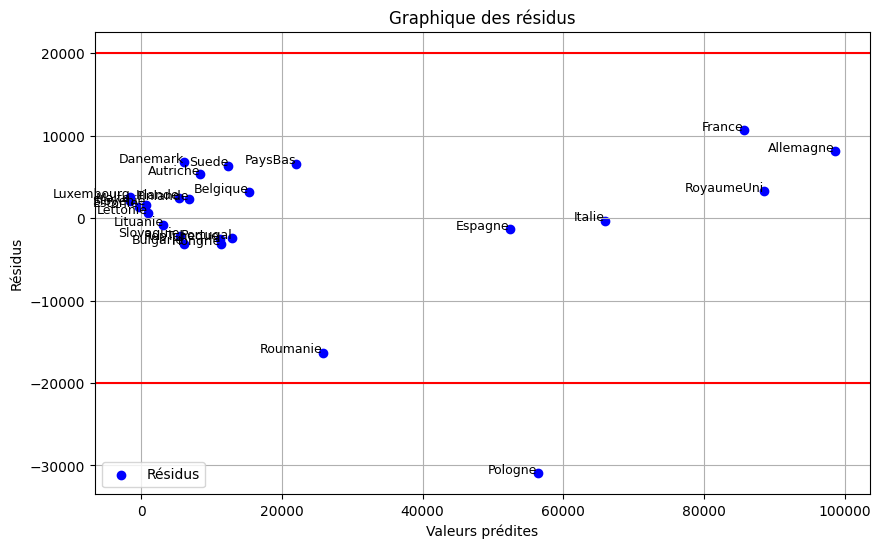

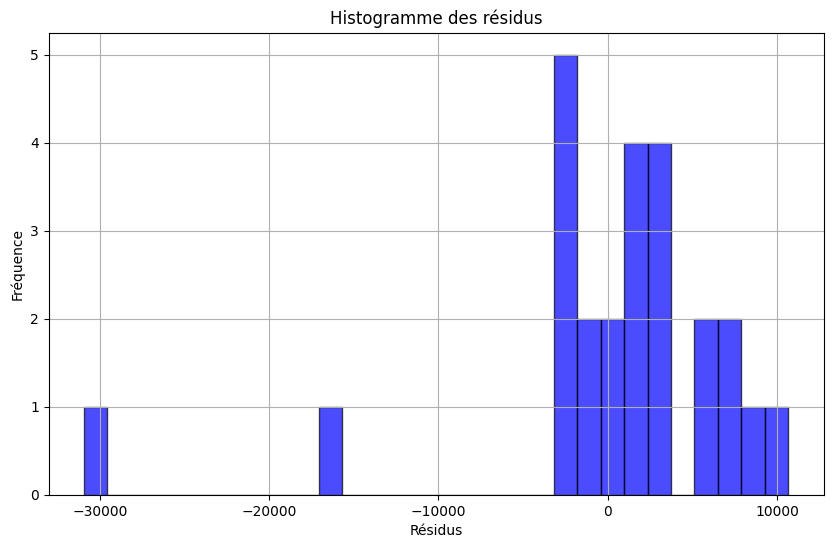

Statistique de Durbin-Watson: [2.07685442]


In [20]:
# Calcul des résidus
residuals = y_clean - y_pred_clean

# Graphique des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_clean, residuals, color='blue', label='Résidus')

# Ajout des noms des pays comme labels
for i, pays in enumerate(df_clean.index):
    plt.text(y_pred_clean[i], residuals[i], pays, fontsize=9, ha='right')

plt.axhline(y=20000, color='red', linestyle='-')
plt.axhline(y=-20000, color='red', linestyle='-')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Graphique des résidus")
plt.grid(True)
plt.legend()
plt.show()

import scipy.stats as stats

# Histogramme des résidus
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.title("Histogramme des résidus")
plt.grid(True)
plt.show()

from statsmodels.stats.stattools import durbin_watson

# Test de Durbin-Watson
dw_stat = durbin_watson(residuals)
print(f"Statistique de Durbin-Watson: {dw_stat}")

Après PaysMagique, c'est maintenant la Pologne qui est considérée comme atypique. Le R² valant 93%, il est intéressant de tester un modèle sur un jeu de données sans la Pologne et PaysMagique pour tester l'évolutivité du R².

### Suppression des individus atypiques : Pologne

In [21]:
y_clean = df_clean['Depenses']

# Données
X = np.array(x_clean).reshape(-1, 1)
y = np.array(y_clean)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédictions
y_pred = model.predict(X)

# Calcul des résidus
residuals = y - y_pred

df_clean['residuals'] = residuals

# Détection des outliers pour nb_eleves et depenses
outliers_nb_eleves, indices_outliers_nb_eleves = detect_outliers_iqr(X)
outliers_depenses, indices_outliers_depenses = detect_outliers_iqr(y_clean)

print(f"Outliers pour nb_eleves: {outliers_nb_eleves}")
print(f"Outliers pour depenses: {outliers_depenses}")

# Suppression de l'individu atypique
outlier = df_clean['residuals'].abs().idxmax()
print("Individu le plus atypique :", df_clean.loc[outlier])
df_clean2 = df_clean.drop(outlier)

Outliers pour nb_eleves: [array([14065.4]), array([12264.6]), array([9510.4]), array([12670.5])]
Outliers pour depenses: [106626.4, 96315.8, 65641.2, 91829.7]
Individu le plus atypique : nbEleves      8168.400000
Depenses     25397.100000
residuals   -30942.725158
Name: Pologne, dtype: float64


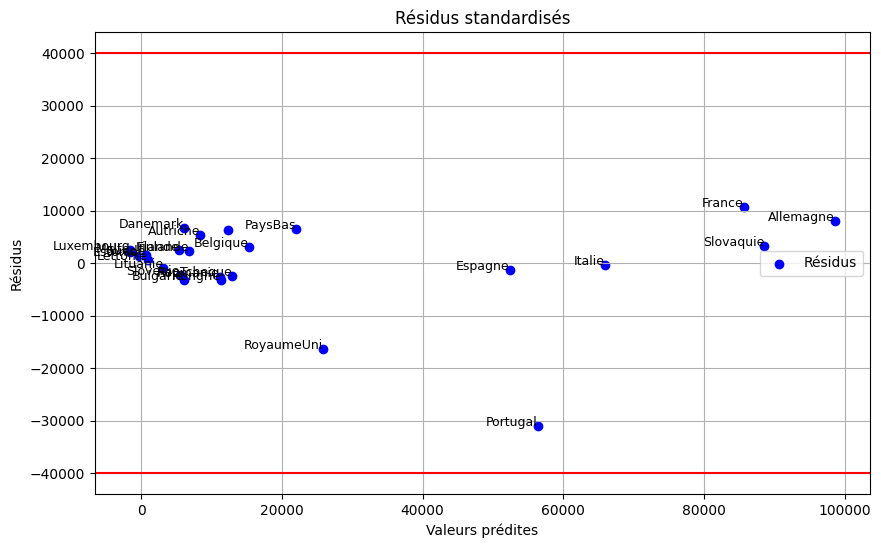

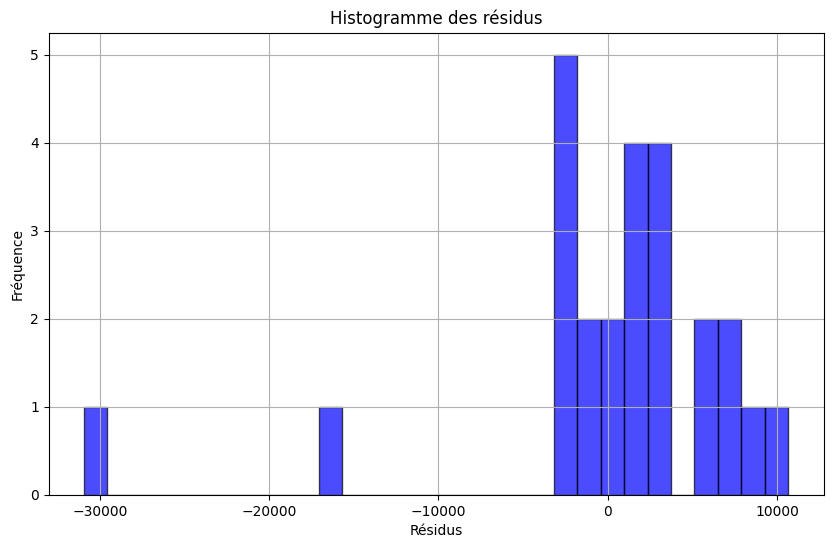

Statistique de Durbin-Watson: 2.076854424252966


In [22]:
# Graphique des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', label='Résidus')

# Ajout des noms des pays comme labels
for i, pays in enumerate(df_clean2.index):
    plt.text(y_pred[i], residuals[i], pays, fontsize=9, ha='right')

plt.axhline(y=40000, color='red', linestyle='-')
plt.axhline(y=-40000, color='red', linestyle='-')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Résidus standardisés")
plt.grid(True)
plt.legend()
plt.show()

# Histogramme des résidus
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.title("Histogramme des résidus")
plt.grid(True)
plt.show()

# Test de Durbin-Watson
dw_stat = durbin_watson(residuals)
print(f"Statistique de Durbin-Watson: {dw_stat}")

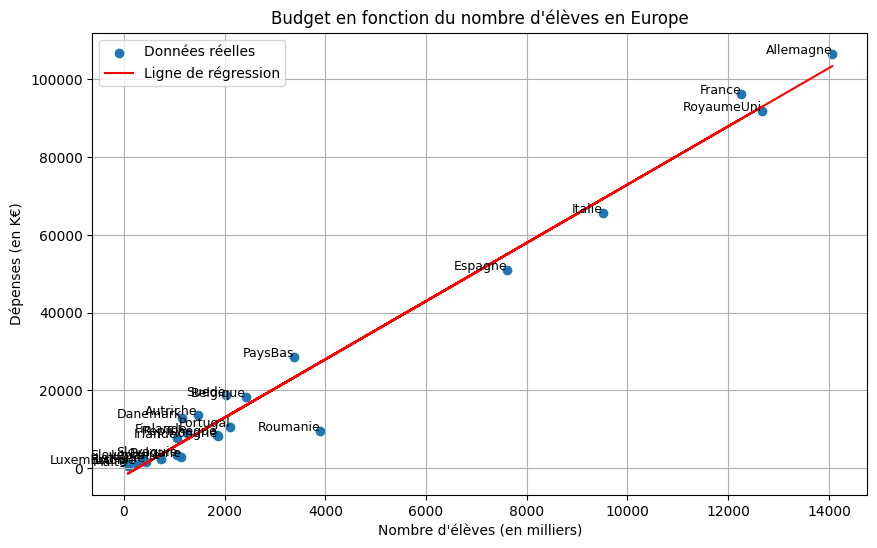

Coefficient de régression: [7.49379628]
Intercept: [-1977.99966355]
R^2 score: 0.9756380074136286


In [23]:
# On poursuit avec le jeu de données nettoyées
x_clean = df_clean2[['nbEleves']]
y_clean = df_clean2[['Depenses']]

X_clean = np.array(x_clean).reshape(-1, 1)
y_clean = np.array(y_clean)

model_clean = LinearRegression()
model_clean.fit(x_clean, y_clean)

# Prédictions avec les données nettoyées
y_pred_clean = model_clean.predict(x_clean)

# Affichage du graphique avec la ligne de régression
plt.figure(figsize=(10, 6))
plt.scatter(x_clean, y_clean, label='Données réelles')

# Ajout des noms des pays comme labels
for i, pays in enumerate(df_clean2.index):
    plt.text(X_clean[i], y_clean[i], pays, fontsize=9, ha='right')

plt.plot(x_clean, y_pred_clean, color='red', label='Ligne de régression')
plt.xlabel("Nombre d'élèves (en milliers)")
plt.ylabel("Dépenses (en K€)")
plt.title("Budget en fonction du nombre d\'élèves en Europe")
plt.legend()
plt.grid(True)
plt.show()

# Coefficients
print(f"Coefficient de régression: {model_clean.coef_[0]}")
print(f"Intercept: {model_clean.intercept_}")
print(f"R^2 score: {model_clean.score(x_clean, y_clean)}")

Après suppression de deux individus atypiques (PaysMagique et Pologne), le R^2 est très proche de 1, cela montre que le modèle était fortement affecté par ces deux valeurs. Maintenant, 97% de la variabilité des dépenses est expliquée par le modèle.